In [1]:
"""
重力位、重力及重力梯度三维正演
"""
# 3rd imports
import matplotlib.pyplot as plt
# local imports
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import prism
from geoist.vis import giplt

In [2]:
#模型设置
model = [geometry.Prism(-4000, -3000, -4000, -3000, 0, 2000, {'density': 1000}),
         geometry.Prism(-1000, 1000, -1000, 1000, 0, 2000, {'density': -900}),
         geometry.Prism(2000, 4000, 3000, 4000, 0, 2000, {'density': 1300})]
shape = (100, 100)
xp, yp, zp = gridder.regular((-5000, 5000, -5000, 5000), shape, z=-150)

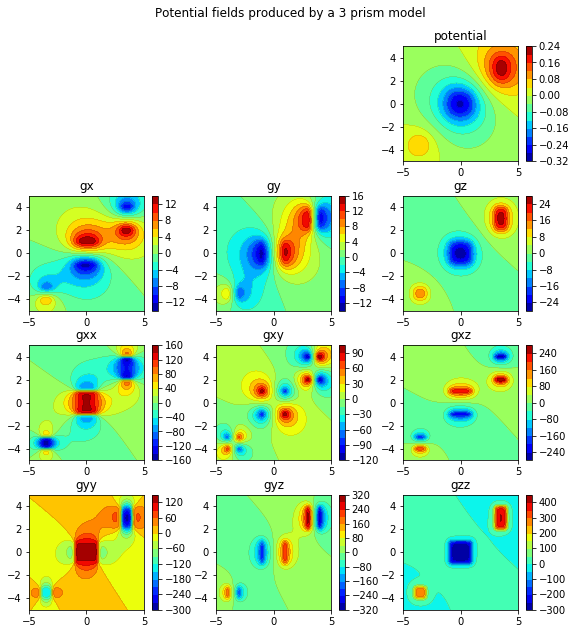

In [3]:
#正演计算
fields = [prism.potential(xp, yp, zp, model),
          prism.gx(xp, yp, zp, model),
          prism.gy(xp, yp, zp, model),
          prism.gz(xp, yp, zp, model),
          prism.gxx(xp, yp, zp, model),
          prism.gxy(xp, yp, zp, model),
          prism.gxz(xp, yp, zp, model),
          prism.gyy(xp, yp, zp, model),
          prism.gyz(xp, yp, zp, model),
          prism.gzz(xp, yp, zp, model)]
titles = ['potential', 'gx', 'gy', 'gz',
          'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']
#gz分量为例画图
plt.figure(figsize=(8, 9))
plt.subplots_adjust(left=0.03, right=0.95, bottom=0.05, top=0.92, hspace=0.3)
plt.suptitle("Potential fields produced by a 3 prism model")
for i, field in enumerate(fields):
    plt.subplot(4, 3, i + 3)
    plt.axis('scaled')
    plt.title(titles[i])
    levels = giplt.contourf(yp * 0.001, xp * 0.001, field, shape, 15)
    cb = plt.colorbar()
    giplt.contour(yp * 0.001, xp * 0.001, field, shape,
                levels, clabel=False, linewidth=0.1)
plt.show()